In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.datasets import fetch_openml


In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"], mnist["target"].astype(np.int8)

In [3]:
print(f"Original data shape: {X.shape}")
print(f"Original label shape: {y.shape}")


Original data shape: (70000, 784)
Original label shape: (70000,)


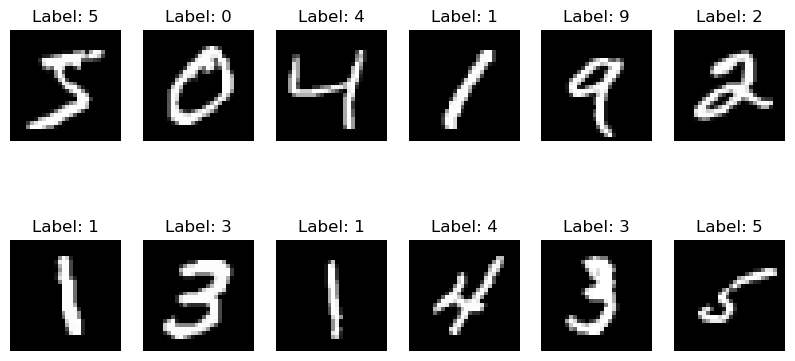

In [4]:
# Check if X is a numpy array or convert it
import numpy as np
if not isinstance(X, np.ndarray):
    X = np.array(X)
if not isinstance(y, np.ndarray):
    y = np.array(y)

# Function to plot samples
def plot_some_samples(X, y, num_samples=12):
    plt.figure(figsize=(10, 5))
    for i in range(0, num_samples):
        # Reshape the image to 28x28 and plot
        plt.subplot(2, 6, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Use the function to plot samples
plot_some_samples(X, y)

In [5]:
X = X / 255 
X_flatten = X.reshape(X.shape[0], 28 * 28) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets after flattening
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (56000, 784)
Testing data shape: (14000, 784)


In [7]:
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

In [8]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()), ('classifier', SVC(kernel='linear', C=1))])
pipe_1.fit(X_train_small, y_train_small)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])

In [9]:
acc_linear = cross_val_score(pipe_1, X_train_small, y_train_small, cv=2)
print("Training Accuracy with Linear SVM: {:.2f}%".format(acc_linear.mean() * 100))

Training Accuracy with Linear SVM: 90.55%


Confusion Matrix - Linear SVM:


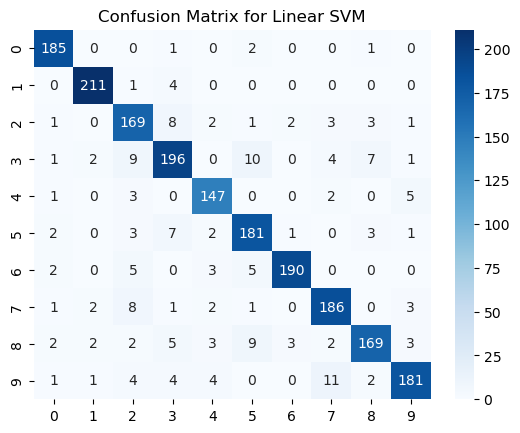

In [10]:
y_pred_linear = pipe_1.predict(X_test_small)
print("Confusion Matrix - Linear SVM:")
conf_matrix_linear = confusion_matrix(y_test_small, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Linear SVM")
plt.show()


In [11]:
print("Classification Report - Linear SVM:")
print(classification_report(y_test_small, y_pred_linear))

Classification Report - Linear SVM:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.97      0.98      0.97       216
           2       0.83      0.89      0.86       190
           3       0.87      0.85      0.86       230
           4       0.90      0.93      0.92       158
           5       0.87      0.91      0.89       200
           6       0.97      0.93      0.95       205
           7       0.89      0.91      0.90       204
           8       0.91      0.84      0.88       200
           9       0.93      0.87      0.90       208

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [12]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()), ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))])
pipe_2.fit(X_train_small, y_train_small)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])

In [13]:
acc_rbf = cross_val_score(pipe_2, X_train_small, y_train_small, cv=2)
print("Training Accuracy with Nonlinear SVM (RBF Kernel): {:.2f}%".format(acc_rbf.mean() * 100))  

Training Accuracy with Nonlinear SVM (RBF Kernel): 81.83%


Confusion Matrix - Nonlinear SVM (RBF Kernel):


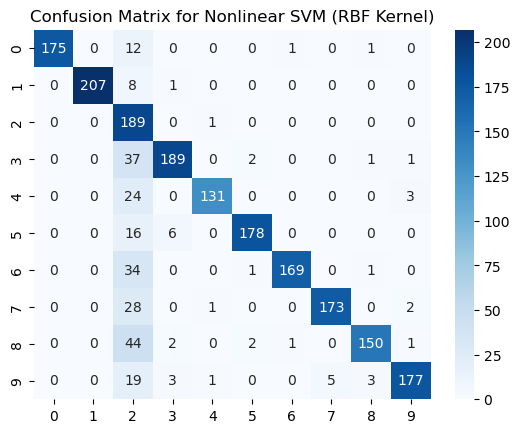

In [14]:
y_pred_rbf = pipe_2.predict(X_test_small)

print("Confusion Matrix - Nonlinear SVM (RBF Kernel):")
conf_matrix_rbf = confusion_matrix(y_test_small, y_pred_rbf)
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Nonlinear SVM (RBF Kernel)")
plt.show()

In [15]:
print("Classification Report - Nonlinear SVM (RBF Kernel):")
print(classification_report(y_test_small, y_pred_rbf))

Classification Report - Nonlinear SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       189
           1       1.00      0.96      0.98       216
           2       0.46      0.99      0.63       190
           3       0.94      0.82      0.88       230
           4       0.98      0.83      0.90       158
           5       0.97      0.89      0.93       200
           6       0.99      0.82      0.90       205
           7       0.97      0.85      0.91       204
           8       0.96      0.75      0.84       200
           9       0.96      0.85      0.90       208

    accuracy                           0.87      2000
   macro avg       0.92      0.87      0.88      2000
weighted avg       0.93      0.87      0.88      2000



In [16]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.001, 0.01, 0.1]
}

In [17]:
grid_search = GridSearchCV(pipe_2, param_grid, cv=2)
grid_search.fit(X_train_small, y_train_small)

# Get the best parameters from the grid search
print("Best parameters from grid search: ", grid_search.best_params_)

Best parameters from grid search:  {'classifier__C': 10, 'classifier__gamma': 0.01}


In [18]:
# Final evaluation with the best model
best_model = grid_search.best_estimator_
acc_best = cross_val_score(best_model, X_train_small, y_train_small, cv=2)
print("Best Model Training Accuracy: {:.2f}%".format(acc_best.mean() * 100))

Best Model Training Accuracy: 95.25%
